In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\DHRUV AGARWAL\Desktop\Machine-Learning-Algorithms\Datasets\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,"Iris-virginica":2},inplace=True)

In [6]:
x=df.drop(['Species','Id'],axis=1)
y=df['Species']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

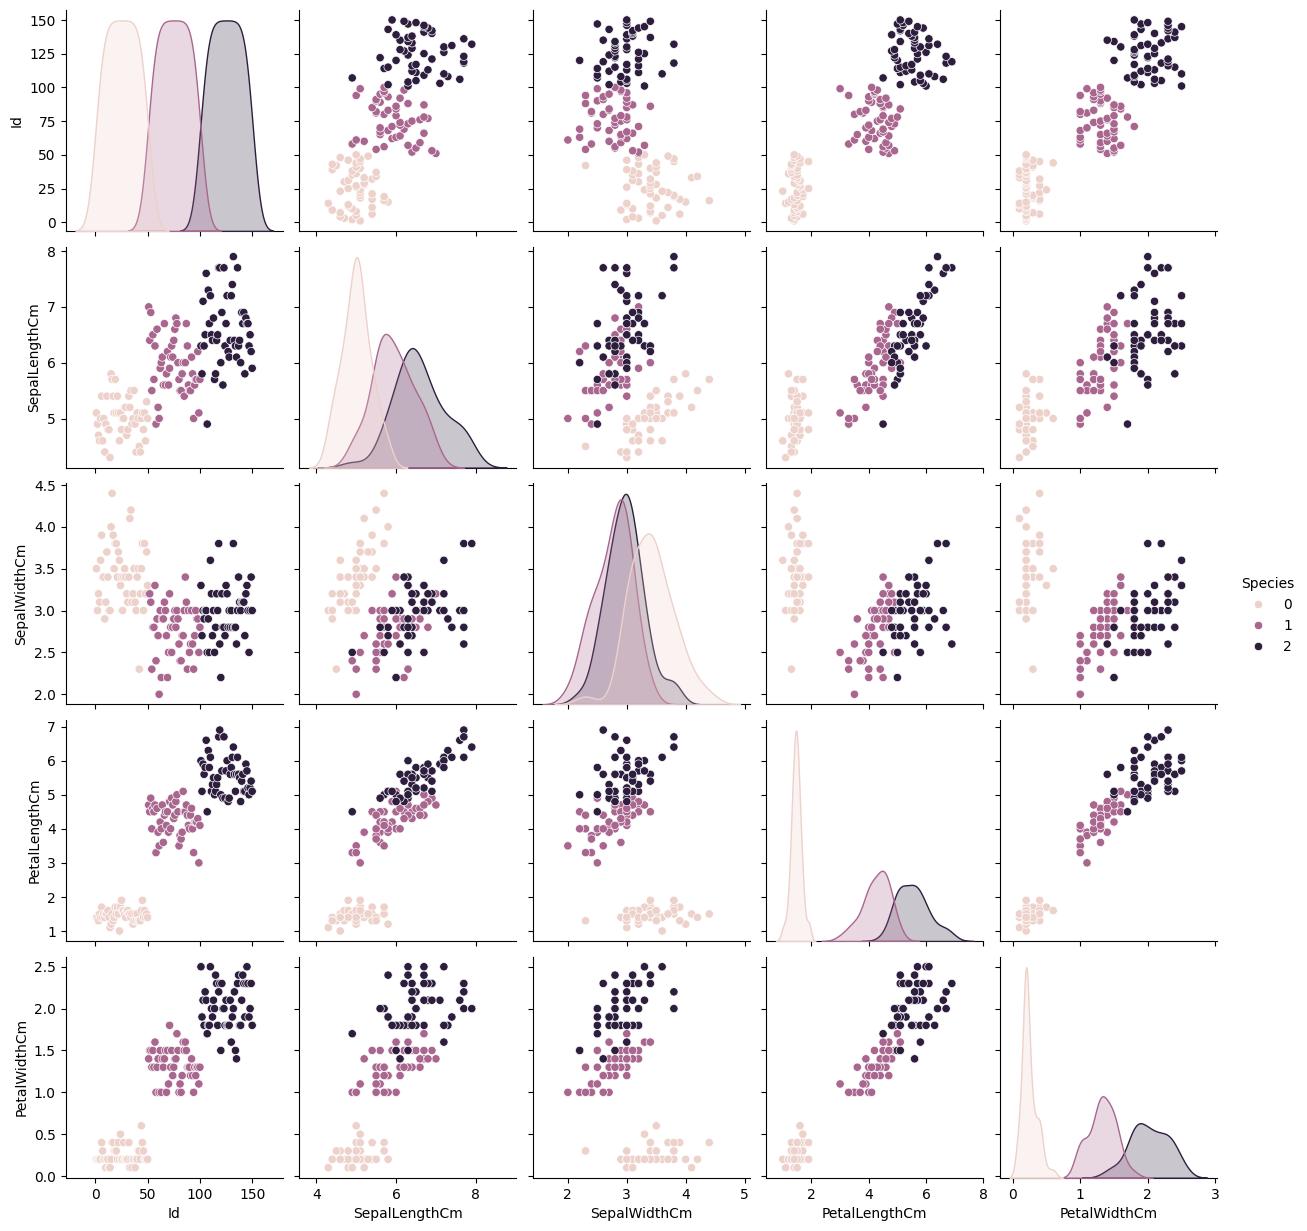

In [9]:
sns.pairplot(df,hue='Species')

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error')
print("Cross-validated MSE:",-np.mean(score))


Cross-validated MSE: 0.05514341751456142


In [15]:
pred=model.predict(x_test_scaled)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 0, 'Actual Values')

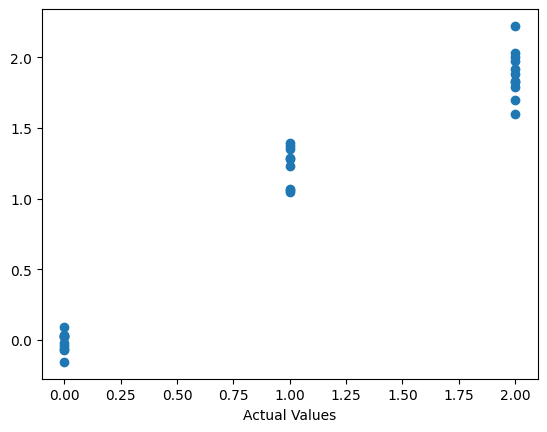

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test,np.round(pred)))
print("\nClassification Report:\n",classification_report(y_test,np.round(pred)))
plt.scatter(y_test,pred)
plt.xlabel("Actual Values")

In [18]:
print("modal acuracy:",accuracy_score(y_test,np.round(pred)))

modal acuracy: 1.0
